### About GeoIQ

GeoIQ is a leading location intelligence platform that leverages its AI and ML capabilities to provide critical information regarding locations, people, their behaviours, businesses, and their potential. The company’s machine learning engine identifies the ‘why’ behind the ‘where’, thus unlocking patterns in business data.

### Introduction


While there’s no doubt that machine learning (ML) can be a great tool for businesses of all shapes and sizes, actually building ML models can seem daunting at first. GeoIQ automl python package helps you build ML models that are tailored to your specific needs, without needing deep ML expertise.

AutoML solutions provide a user interface that walks you through each step of model building, including importing data, training your model on the data, evaluating model performance, and predicting values with the model. But, what if you want to use AutoML products outside of the user interface? If you’re working with structured data, one way to do it is by using the AutoML python package, which lets you trigger-or even automate-each step of the process through code. 

In this notebook, we'll use an example to show how you can use the package from end-to-end within your Jupyter Notebook. Jupyter Notebooks are one of the most popular development tools for data scientists. They enable you to create interactive, shareable notebooks with code snippets and markdown for explanations, so you can leverage the power of AutoML technology.

There are several benefits of using AutoML technology from a notebook. Each step and setting can be codified so that it runs and customized according to your need. Also, it's common, even with AutoML, to need to manipulate the source data before training the model with it. By using a notebook, you can use common tools like pandas and numpy to preprocess the data in the same workflow. Finally, you have the option of creating a model with another framework, and ensemble that together with the AutoML model, for potentially better results. 

Let's get started!

### Installation

You can pip install your package with this URL like this:

In [ ]:
!pip install git+https://github.com/geoiq-io/geoiq_automl.git

### API key generation

Generated API keys can be used for real time prediction pipelines. The steps for generating API keys for AutoML in the GeoIQ platform.

1. Sign up to our GeoIQ automl platform [geoiq_automl](https://auth.geoiq.io/in/login?redirect_uri=https%3A%2F%2Fautoml.geoiq.io%2Fin)

2. Navigate to management [console](https://console.geoiq.io/in/home)



 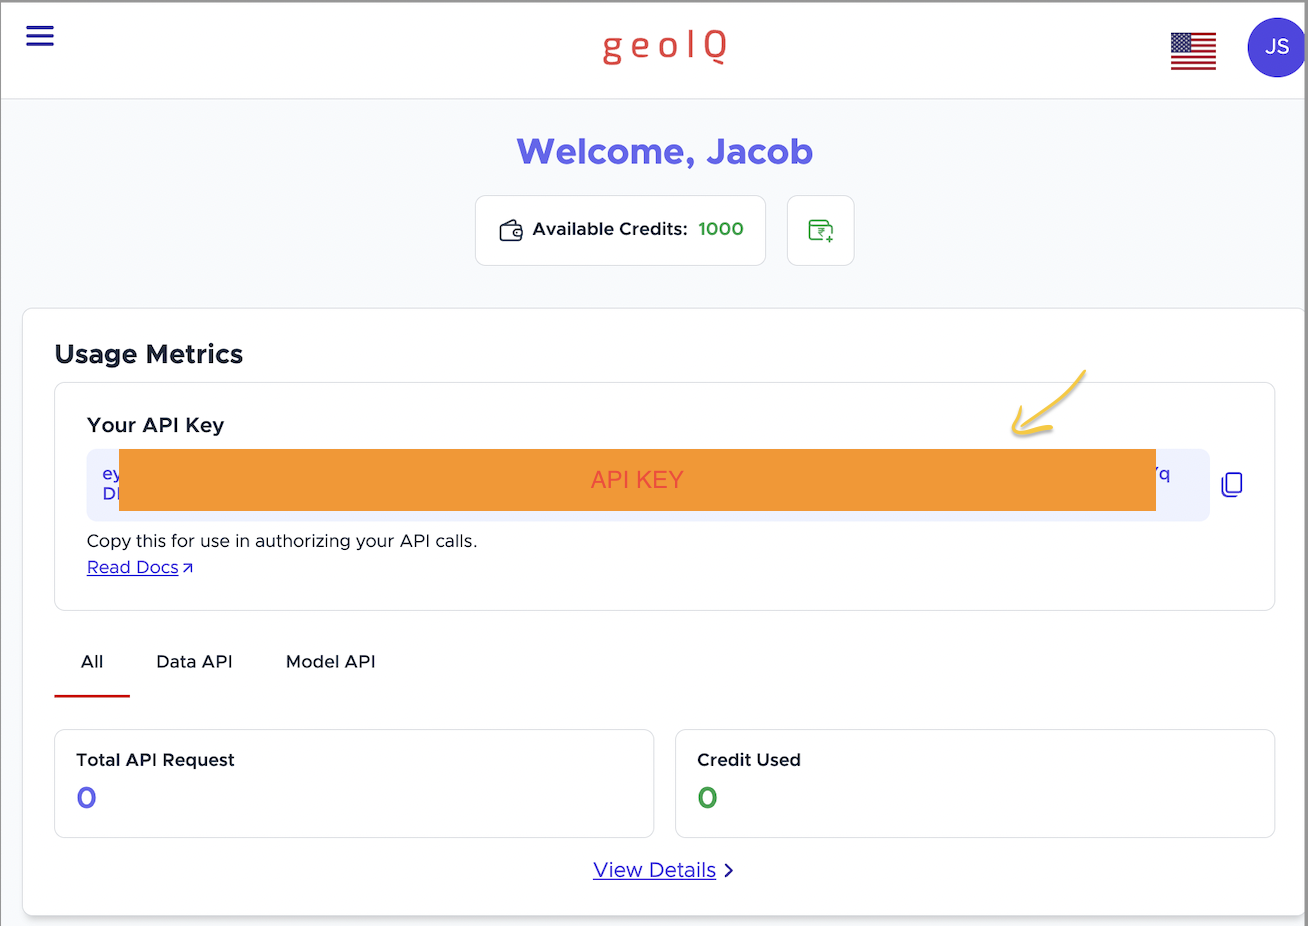

An API key is generated. Copy the API key and store it in a safe place.

In [1]:
## Import the required packages

import pandas as pd
import geoiq_automl

In [2]:
# Set the API key as a string variables.
your_key = '******************************'


Our Python library is designed to simplify the process of accessing the GeoIQ API within a Python script. Instantiating an geoiq_automl object requires an GeoIQ API key (which can be obtained by following above steps)

In [3]:
#### GeoQI automl object
result = geoiq_automl.automl(your_key)

AutoML object is created at 2023-03-14 01:19:55.443549


### Import Data

The first step is to create a dataset id, which is essentially a unique identifier for the data in the geoiq automl platform.

In [8]:
#Reading a local data file to a dataframe

df = pd.read_csv('sample_dataset.csv',
                 usecols=['geoiq_identifier_col', 'latitude','longitude', 
                                      'full_address', 'pincode', 'dv'])

In [9]:
df.head()

,geoiq_identifier_col,latitude,longitude,full_address,pincode,dv
0,40029,26.983875,83.546981,147 Aslam chicken center harpur tiwari Mahar...,273301,0
1,40030,28.608530,77.365282,b28/29 noida sector 59 b28 29 noida Ghaziabad ...,201301,0
2,40031,19.247755,72.977715,102/ 103 dhanlaxmi shopping centre patalipada ...,400610,0
3,40032,25.814961,81.874166,23 santhoshi mata mandir sarai sujan post Hara...,230402,0
4,40033,22.753811,75.907766,73 Uday nagar indore Indore Madhya Pradesh,452016,0


In [10]:
df.shape

(1000, 6)

### Data prepration

Using latitude and longitude to identify the location **(geocoding  = false)**

In [11]:
df.head()

,geoiq_identifier_col,latitude,longitude,full_address,pincode,dv
0,40029,26.983875,83.546981,147 Aslam chicken center harpur tiwari Mahar...,273301,0
1,40030,28.608530,77.365282,b28/29 noida sector 59 b28 29 noida Ghaziabad ...,201301,0
2,40031,19.247755,72.977715,102/ 103 dhanlaxmi shopping centre patalipada ...,400610,0
3,40032,25.814961,81.874166,23 santhoshi mata mandir sarai sujan post Hara...,230402,0
4,40033,22.753811,75.907766,73 Uday nagar indore Indore Madhya Pradesh,452016,0


In [63]:
# dataset_id : The ID for the dataset that you want to create. This ID is unique in the geoiq automl platform.

dataset_id = result.create_dataset(df, dataset_name ='sample_data' ,
                                   dv_col = 'dv', dv_positive = '1',latitude_col = "geoiq_lat" ,
                                   longitude_col = "geoiq_lng",unique_col = 'index',geocoding = 'f',
                                   address_col = '', pincode_col = '' , additional_vars = '[]')

{"data":{"dataset_id":"3d5a8c0e-61b9-493b-b3aa-6a91d859e5ea","message":"Dataset creation started successfully.","status":"In progress"}}



In [8]:
# Return the progress and information on the dataset

result.describe_dataset(dataset_id)

Dataset creation is completed for this dataset id ad4e0b66-f9f4-4974-94e6-eb12de8ac5a1


'1fbf9970-08bd-43d9-a6f2-476e6e671b9c'

Using addresses to identify the location **(geocoding  = true)**

In [ ]:
dataset_id = result.create_dataset(df, dataset_name ='test_7_mar_23_geocoding' ,dv_col = 'dv', 
                                   dv_positive = '1',latitude_col = "" , longitude_col = "",
                                   unique_col ='geoiq_identifier_col',geocoding = 't',address_col = 'address', 
                                   pincode_col = 'pincode' , additional_vars = '[]')

In [43]:
result.describe_dataset(dataset_id)

Dataset creation is completed for this dataset id 2cf9f192-1497-42cc-98b8-543247cb9538


'ee948fd4-5656-4b8e-9db3-4f0739618272'

#### Dataset Info

The dataset_info() method prints information about the dataset.

In [4]:
result.dataset_info(dataset_id)

{'address_col': None,
 'created_at': '2023-03-06 15:12:45',
 'data_path': 'https://geoiq-auto-ml.s3.ap-south-1.amazonaws.com/0644fa4b-5c4c-449c-ab89-b0c70542275f/csv/b9893695cb96443ab9f0930393c7a7d9.csv',
 'data_size': 0.169,
 'data_type': 'csv',
 'dv_col': 'dv',
 'dv_col_id': '6c956e7f-48d5-4924-b2a5-ebd81b232b18',
 'dv_positive': '1',
 'dv_rate': 14.5,
 'geocoding': False,
 'id': '2cf9f192-1497-42cc-98b8-543247cb9538',
 'identifier_col': 'index',
 'is_defined': True,
 'is_sample': False,
 'lat_col': 'geoiq_lat',
 'lng_col': 'geoiq_lng',
 'name': 'test_6_mar_23',
 'number_of_categorical': 1,
 'number_of_columns': 8,
 'number_of_numerical': 7,
 'number_of_rows': 999,
 'number_of_rows_geoiq': 999,
 'pincode_col': None,
 'remarks': None,
 'status': 'Completed',
 'total_dv_rate': 14.5,
 'updated_at': '2023-03-06 15:21:12',
 'user_selected_vars': []}

### Manage your datasets

A project can have multiple datasets. You can get a list of the available datasets and can delete datasets you no longer need.

#### List of all datasets

In [15]:
result.list_datasets()

,id,name,status,url
0,ad4e0b66-f9f4-4974-94e6-eb12de8ac5a1,test_2_mar_23,Completed,https://automl.geoiq.io/in/dataset/ad4e0b66-f9...
1,f9a1ce9d-e21a-4560-a885-75a701d93c34,test_7_mar_23_geocoding,In progress,https://automl.geoiq.io/in/dataset/f9a1ce9d-e2...
2,2cf9f192-1497-42cc-98b8-543247cb9538,test_6_mar_23,Completed,https://automl.geoiq.io/in/dataset/2cf9f192-14...


In [5]:
all_datasets = result.list_datasets()

#### Delete the datasets

In [ ]:
result.delete_dataset(dataset_id)

### EDA

Exploratory Data Analysis (EDA), also known as data exploration, is a step in the data analysis process, where a number of techniques are used to better understand the dataset being used.

In [29]:
## Returned dataframe is descendingly sorted on the basis of IV
result.eda(dataset_id)

,column_name,column_type,iv,auc_1,auc_2,auc_3,bins,catchment,category,F_test_pvalue,T_test_pvalue,desc_name,description,deviation,direction,id,ks,major_category,max_ks,mean,name,normalization_level,roc,sd,sub_category_name,unique,unique_count,variable
0,p_health_hp_nc_1000,FLOAT,0.295,0.581,0.590,0.598,10.0,1000,Hospitals and Clinics - catchment 1000 m,0.000,0.000,Indicates presence of hospitals as a proportio...,Indicates presence of hospitals as a proportio...,,1.0,4276e5d7-3678-4617-be1d-9947c36ecddc,,Healthcare,0.199,0.009,p_health_hp_nc,Normalization Country,,0.008,Hospital,,91.0,
1,p_health_cn_np_pincode,FLOAT,0.292,0.549,0.558,0.546,10.0,pincode,Hospitals and Clinics - catchment pincode,0.000,0.000,Indicates the presence of clinics per 1000 peo...,Indicates the presence of clinics per 1000 peo...,,1.0,54e2a402-28be-4160-bc39-6b4122b8033b,,Healthcare,0.126,0.248,p_health_cn_np_pincode,Normalization NA,,0.200,Clinics,,634.0,
2,retail_index,FLOAT,0.281,0.569,0.586,0.592,10.0,None,GeoIQ Indices,0.000,0.000,The attribute indicates presence of retail out...,The attribute indicates presence of retail out...,,1.0,e78300a2-37f8-4e28-87ae-339fe1bc44ba,,GeoIQ Indices,0.213,0.566,retail_index,Normalization NA,,0.218,GeoIQ Indices,,297.0,
3,p_retail_ap_nc_1000,FLOAT,0.273,0.548,0.579,0.554,10.0,1000,Apparel - catchment 1000 m,0.000,0.000,Indicates presence of apparel brands as a prop...,Indicates presence of apparel brands as a prop...,,1.0,e8b6d333-1269-4974-9551-e3182f1798cc,,Commercial - Retail,0.173,0.016,p_retail_ap_nc,Normalization Country,,0.019,Apparel,,338.0,
4,br_jewelery_nc_500,FLOAT,0.270,0.552,0.587,0.570,10.0,500,Jewelry - catchment 500 m,0.000,0.000,Indicates presence of jewelry brands as a prop...,Indicates presence of jewelry brands as a prop...,,1.0,e7dce27c-eeda-4e9d-9473-d758e31d28b0,,Commercial - Retail,0.168,0.021,br_jewelery_nc,Normalization Country,,0.077,Jewelery Brands,,9.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,secc_p_hh_oc_is_bgng_chrty_cltns_r,FLOAT,0.000,0.520,0.518,0.527,1.0,None,Households by Source of Income,0.019,0.019,Percentage Number of Households that are rural...,Percentage Number of Households that are rural...,,0.0,5d639af8-da38-49e5-9eb8-84f628608cc3,,Socio-economic,0.000,0.035,secc_p_hh_oc_is_bgng_chrty_cltns_r,Normalization NA,,0.104,Income Source- Begging/Charity/ Alms collection,,46.0,
3167,secc_p_hh_oc_ht_kch_3_r,FLOAT,0.000,0.501,0.508,0.496,1.0,None,Households Type & Amenity,0.306,0.306,Percentage number of Households that are rural...,Percentage number of Households that are rural...,,0.0,ca050769-4259-41e3-b288-328029d1e347,,Socio-economic,0.000,0.176,secc_p_hh_oc_ht_kch_3_r,Normalization NA,,0.607,Rooms in Kuccha House,,100.0,
3168,secc_p_hh_oc_ht_kch_3_pls_r,FLOAT,0.000,0.524,0.521,0.504,1.0,None,Households Type & Amenity,0.094,0.094,Percentage number of Households that are rural...,Percentage number of Households that are rural...,,0.0,1249541e-2699-4d5f-8201-0b5878428a73,,Socio-economic,0.000,0.111,secc_p_hh_oc_ht_kch_3_pls_r,Normalization NA,,0.373,Rooms in Kuccha House,,81.0,
3169,secc_p_hh_oc_ht_pck_0_r,FLOAT,0.000,0.526,0.540,0.538,1.0,None,Households Type & Amenity,0.752,0.752,Percentage number of Households that are rural...,Percentage number of Households that are rural...,,0.0,93a95bca-63f6-4ff1-b749-f4ebadf5f008,,Socio-economic,0.000,0.072,secc_p_hh_oc_ht_pck_0_r,Normalization NA,,0.430,Rooms in Pucca House,,28.0,


In [6]:
result.eda(dataset_id).columns

Index(['column_name', 'column_type', 'iv', 'auc_1', 'auc_2', 'auc_3', 'bins',
       'catchment', 'category', 'F_test_pvalue', 'T_test_pvalue', 'desc_name',
       'description', 'deviation', 'direction', 'id', 'ks', 'major_category',
       'max_ks', 'mean', 'name', 'normalization_level', 'roc', 'sd',
       'sub_category_name', 'unique', 'unique_count', 'variable'],
      dtype='object')

#### EDA graphs

The histograms below show us the distribution and frequency of the GeoIQ variable with dependent variable

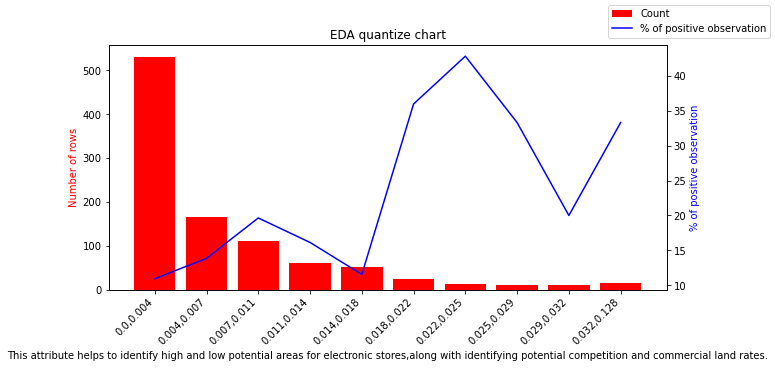

In [30]:
result.variable_distribution_plot(dataset_id,
                                  'p_retail_es_pt_500',
                                  quantize=True)

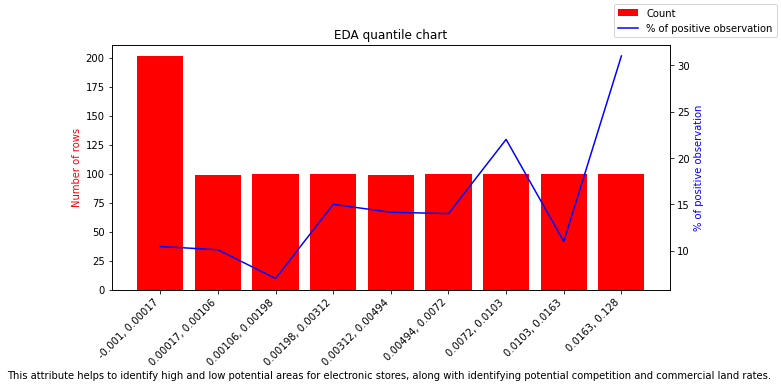

In [8]:
result.variable_distribution_plot(dataset_id,
                                  'p_retail_es_pt_500',
                                  quantize=False)

### Datset Enrichment

**data_enrichment** function allows you to download the geoiq variables for your dataset.
GeoIQ [credits](https://console.geoiq.io/in/credits) are required to avail this functionality.

In [ ]:
result.data_enrichment(dataset_id,                     
                       ['p_retail_es_pt_500',
                        'mat_wall_mud_unbrnt_brck_perc_500',
                        'p_health_hp_np_1000'])

### Modelling

#### Model List for single dataset

In [32]:
all_models = result.list_models(dataset_id)

## Get_all_models

**Baseline Model**

In [6]:
# The first model created automatically
default_model_id = result.list_models(dataset_id).tail(1).reset_index(drop=True)['model_id'][0]

#### Custom model

Create your own custom test/train/validation split and specify the column to use for the split

In [31]:
new_model = result.create_custom_model( dataset_id=dataset_id,model_name="test_7_mar_23_updated",
                                       model_type = "xgboost", split_ratio ="[0.8,0.2,None]")

### Evaluate the model

After training has been completed, you can review various performance statistics on the model, such as the IV, AUC, KS, and so on. The metrics are returned in a dataframe, and here we can also visualize the lift and ROC chart

#### Model Summary

In [ ]:
model_id = result.list_models(dataset_id).tail(1).reset_index(drop=True)['model_id'][0]

In [24]:
result.model_summary(model_id)

## Json output

,name,started_at,completed_at,dv_col,dv_rate,model_comments,variable_count,iv_holdout,iv_train,holdout_auc,train_auc,holdout_ks,train_ks
0,test_2_mar_23_updated,2023-03-02 13:59:27,2023-03-02 14:03:54,dv,0.145,"[Try uploading more number of rows., Ensure en...",120,0.545,0.633,0.533,0.704,0.144,0.312


#### Lift Chart

Lift is the ratio of the number of positive observations up to decile i using the model to the expected number of positives up to that decile i based on a random model. 
Lift chart is the chart between the lift on the vertical axis and the corresponding decile on the horizontal axis.


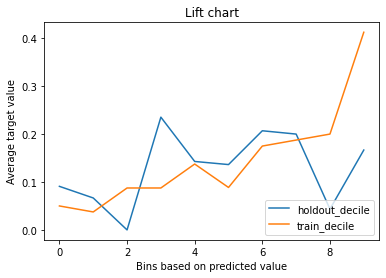

In [25]:
result.create_lift_chart(model_id)

#### AUC-ROC Chart

1. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
2. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

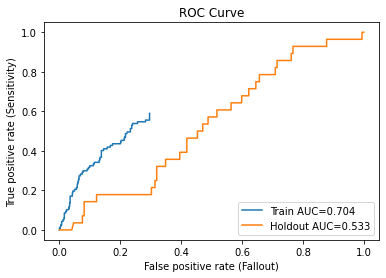

In [26]:
result.create_roc_chart(model_id)

#### Feature Importance

In [27]:
result.get_feature_importance(model_id)

,catchment,category,column_name,column_uuid_id,desc_name,description,id,importance_val,is_geoiq_var,major_category,name,normalization_level,sub_category_name
0,1000,Hospitals and Clinics - catchment 1000 m,p_health_hp_nc_1000,2de71dc8-8ee2-4e0f-8a2f-ed44017afb54,Indicates presence of hospitals as a proportio...,Indicates presence of hospitals as a proportio...,1395,100.00,True,Healthcare,p_health_hp_nc,Normalization Country,Hospital
1,1000,Apparel - catchment 1000 m,p_retail_ap_np_1000,f4f9437c-4bcb-4000-b679-9b4131699aef,Indicates the presence of apparel brands per 1...,Indicates the presence of apparel brands per 1...,878,68.55,True,Commercial - Retail,p_retail_ap_np,Normalization Population,Apparel
2,500,Population by Caste - catchment 500 m,m_sc_perc_500,9409ce19-7874-4664-aa8d-5007797ee7c1,This attribute shows the percentage of total m...,This attribute shows the percentage of total m...,351,48.75,True,Demography,m_sc_perc,Normalization NA,Male Population - SC
3,1000,Shoe Store - catchment 1000 m,p_retail_ss_np_1000,07492e42-59ae-455c-87dc-540cce0219f4,Indicates the presence of shoe stores per 1000...,Indicates the presence of shoe stores per 1000...,894,37.50,True,Commercial - Retail,p_retail_ss_np,Normalization Population,Shoe Store
4,1000,Gas Agency - catchment 1000 m,p_utility_ga_np_1000,c9eb8c84-9ddd-485c-b5cf-2a844edd816f,Indicates the presence of gas agencies per 100...,Indicates the presence of gas agencies per 100...,812,32.21,True,Commercial - Retail,p_utility_ga_np,Normalization Population,Gas Agency
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,200,Miscellaneous Retail Outlets - catchment 200 m,p_retail_ot_nt_200,f5cf0842-c13b-41b4-8661-4d42e03e5e3f,Indicates presence of other retail outlets as ...,Indicates presence of other retail outlets as ...,730,0.00,True,Commercial - Retail,p_retail_ot_nt,Normalization Taluka,Other Retail
116,500,Grocery & Hypermarkets - catchment 500 m,p_retail_gc_nt_500,a1a0499f-071b-494b-af87-946e89942fc9,Indicates presence of groceries as a proportio...,Indicates presence of groceries as a proportio...,705,0.00,True,Commercial - Retail,p_retail_gc_nt,Normalization Taluka,Grocery & Hypermarkets
117,500,Education - catchment 500 m,p_education_me_nt_500,871cfa83-60c8-4ad6-a856-3b39c5d2e35f,Indicates presence of Misc Education as a prop...,Indicates presence of Misc Education as a prop...,723,0.00,True,Civic Infrastructure,p_education_me_nt,Normalization Taluka,Misc Education
118,500,Education - catchment 500 m,p_education_cc_nt_500,08b355df-1cb1-4536-a6b7-bae3527ba1f7,Indicates presence of coaching centres as a pr...,Indicates presence of coaching centres as a pr...,802,0.00,True,Civic Infrastructure,p_education_cc_nt,Normalization Taluka,Coaching


#### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [29]:
result.get_confusion_matrix(dataset_id,model_id,0.4)

## If threshold =None , It is optimal threshold for max F1 score, 


,accuracy,f1_score,fn,fp,fpr,mcc,npv,precision_val,sensitivity_val,threshold,tn,tnr,tp
0,0.33166,0.29178,7,527,0.77273,0.14724,0.95679,0.17268,0.94017,0.4,155,0.22727,110


#### Gains Table

 1. Gain table is used to evaluate performance of classification model. 
 2. It measure how much  better one can expect to do with the predictive model comparing without a model.

In [30]:
result.get_gains_table(model_id,split='train')

,Decile,Score Range,Non-positive Class Count,Positive Class Count,KS,Positive Class Percentage
0,0,"(0.31, 0.381]",76,4,0.07725,0.05000
1,1,"(0.381, 0.399]",77,3,0.16451,0.03750
2,2,"(0.399, 0.416]",73,7,0.21172,0.08750
3,3,"(0.416, 0.434]",73,7,0.25893,0.08750
4,4,"(0.434, 0.451]",69,11,0.26609,0.13750
5,5,"(0.451, 0.467]",72,7,0.31183,0.08861
6,6,"(0.467, 0.487]",66,14,0.28894,0.17500
7,7,"(0.487, 0.51]",65,15,0.25605,0.18750
8,8,"(0.51, 0.546]",64,16,0.21314,0.20000
9,9,"(0.546, 0.644]",47,33,0.00000,0.41250


### Manage your models

A project can have multiple models. You can get a list of the available models and can delete models you no longer need.

#### List of all models

In [16]:
result.list_models(dataset_id)

,dataset_id,model_id,model_name,status,url
0,2cf9f192-1497-42cc-98b8-543247cb9538,ee948fd4-5656-4b8e-9db3-4f0739618272,test_6_mar_23 - model,Completed,https://automl.geoiq.io/in/model/ee948fd4-5656...
1,2cf9f192-1497-42cc-98b8-543247cb9538,2fcd96a9-5d46-4a21-8819-12e1ad9e2f6c,test_2_mar_23_updated,Completed,https://automl.geoiq.io/in/model/2fcd96a9-5d46...


#### Delete the models

In [ ]:
result.delete_model(model_id)

### Validation

#### Create validation dataset

In [10]:
df.head()

,geoiq_identifier_col,latitude,longitude,full_address,pincode,dv
0,40029,26.983875,83.546981,147 Aslam chicken center harpur tiwari Mahar...,273301,0
1,40030,28.608530,77.365282,b28/29 noida sector 59 b28 29 noida Ghaziabad ...,201301,0
2,40031,19.247755,72.977715,102/ 103 dhanlaxmi shopping centre patalipada ...,400610,0
3,40032,25.814961,81.874166,23 santhoshi mata mandir sarai sujan post Hara...,230402,0
4,40033,22.753811,75.907766,73 Uday nagar indore Indore Madhya Pradesh,452016,0


In [11]:
validation_dataset_id = result.create_validation_dataset(df,
                                                         model_id,
                                                         dataset_id,
                                                         name ='validation_dataset1', 
                                                         dv_col='dv',
                                                         dv_positive='1',
                                                         geocoding = 't',
                                                         address = 'full_address', 
                                                         pincode = 'pincode', 
                                                         unique_col = 'geoiq_identifier_col' )

{"data":{"message":"Validation Dataset creation started successfully.","status":"In progress","validation_dataset_id":"8b65c06a-2918-4725-a4a7-cf02aef46de6"}}



#### Validation dataset progress

In [24]:
result.list_validation_datasets('293ac5e0-a1a4-48e6-8777-2496e3e139cc')

,created_at,dataset_name,id,status,updated_at
0,"07 March, 2023 12:20:1678191629",validation_dataset1,930d8ca1-3b84-4161-ba8b-f567f338f0ed,In progress,"07 March, 2023 12:25:1678191903"
1,"07 March, 2023 11:58:1678190339",validation_dataset,98c9e3a8-fac3-4799-8673-087831c15fdf,Created,"07 March, 2023 11:58:1678190339"
2,"07 March, 2023 11:58:1678190329",validation_dataset,177ff0fa-2cae-4421-adfc-f4b0092a51a7,Created,"07 March, 2023 11:58:1678190329"


### Evaluate validation dataset

#### Validation lift chart

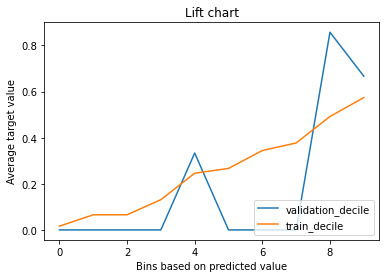

In [16]:
result.create_validation_lift_chart(validation_dataset_id)

#### Validation ROC chart

In [ ]:
result.create_validation_roc_chart(validation_dataset_id)

#### Validation gains table

In [20]:
result.get_validation_gains_table(validation_dataset_id,split = 'train')

,Decile,Score Range,Non-positive Class Count,Positive Class Count,KS,Positive Class Percentage
0,0,"(0.0594, 0.149]",60,1,0.12637,0.01639
1,1,"(0.149, 0.215]",57,4,0.22700,0.06557
2,2,"(0.215, 0.268]",57,4,0.32763,0.06557
3,3,"(0.268, 0.334]",53,8,0.39393,0.13115
4,4,"(0.334, 0.414]",46,15,0.40016,0.24590
5,5,"(0.414, 0.485]",44,16,0.39559,0.26667
6,6,"(0.485, 0.562]",40,21,0.35033,0.34426
7,7,"(0.562, 0.627]",38,23,0.28791,0.37705
8,8,"(0.627, 0.704]",31,30,0.16541,0.49180
9,9,"(0.704, 0.844]",26,35,0.00000,0.57377


#### Validation PSI table

Population stability Index (PSI) is a model monitoring metric that is used to quantify how much the distribution of a continuous response variable has changed between two given samples

In [21]:
result.get_validation_psi_table(validation_dataset_id)

,decile_vals,psi_values,train_count,train_percentage,validation_count,validation_percentage
0,0,0.69138,61,0.10016,0.0,0.00010
1,1,0.69138,61,0.10016,0.0,0.00010
2,2,0.69138,61,0.10016,0.0,0.00010
3,3,0.03059,61,0.10016,1.0,0.05263
4,4,0.02627,61,0.10016,3.0,0.15789
5,5,0.02877,60,0.09852,1.0,0.05263
6,6,0.69138,61,0.10016,0.0,0.00010
7,7,0.69138,61,0.10016,0.0,0.00010
8,8,0.34938,61,0.10016,7.0,0.36842
9,9,0.34938,61,0.10016,7.0,0.36842


#### List of all validation dataset

In [24]:
result.list_validation_datasets(model_id)

,created_at,dataset_name,id,status,updated_at
0,"07 March, 2023 12:20:1678191629",validation_dataset1,930d8ca1-3b84-4161-ba8b-f567f338f0ed,In progress,"07 March, 2023 12:25:1678191903"
1,"07 March, 2023 11:58:1678190339",validation_dataset,98c9e3a8-fac3-4799-8673-087831c15fdf,Created,"07 March, 2023 11:58:1678190339"
2,"07 March, 2023 11:58:1678190329",validation_dataset,177ff0fa-2cae-4421-adfc-f4b0092a51a7,Created,"07 March, 2023 11:58:1678190329"


#### Batch Prediction

After you have created (trained) a model, you can make an asynchronous request for a batch of predictions using the batch predict method. You supply input data to the batchPredict method, in table format. Each row provides values for the features you trained the model to use. The batch predict method sends that data to the model and returns predictions for each row of data.

In [ ]:
result.batch_prediction_download(validation_dataset_id)

### Deployment

 After you have created (trained) a model, you can deploy the model and request online (real-time) predictions. Online predictions accept one row of data and provide a predicted result based on your model for that data. You use online predictions when you need a prediction as input for your business logic flow.

Before you can request an online prediction, you must deploy your model. Deployed models incur GeoIQ [credits](https://console.geoiq.io/in/credits). 

#### Check for the model endpoint

In [27]:
result.get_deployed_model_endpoint(model_id)

,created_at,dataset_name,endpoint_id,model_name,url_endpoint,user_var_list
0,1.677845e+09,test_2_mar_23,9683dbf5-732f-4590-bfe8-9856d31f72de,test_2_mar_23_updated,https://ml.geoiq.io/model/v1.0/293ac5e0-a1a4-4...,[]


#### Create model endpoint

In [29]:
result.create_deployed_model_endpoint(model_id)

,created_at,dataset_name,endpoint_id,model_name,url_endpoint,user_var_list
0,1.678192e+09,test_2_mar_23,3ce8640e-ae8e-4f6e-b4dd-3be4e9160942,test_7_mar_23_updated,https://ml.geoiq.io/model/v1.0/ca46904b-328b-4...,[]


#### Model variable for new lat long

**get_model_var** function allows you to see the geoiq features select in the model.
GeoIQ [credits](https://console.geoiq.io/in/credits) are required to avail this functionality.

In [ ]:
result.get_model_var(40.7579747,-73.9855426,model_id)